# NETFLIX DATASET

### Name: Moustafa Ayman Moustafa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('netflix_titles.csv')

In [3]:
# Check the number of rows and columns.
df.shape

(8807, 12)

In [4]:
# Identify the data types of each column.
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
# Check first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Check missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Handle NULL values.
df.fillna(df.mode().iloc[0], inplace=True)

In [8]:
# Check missing values again if there is remaining or not.
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
# Check for duplicates
df.duplicated().sum()

0

In [10]:
# Basic statistics
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
# Convert 'date_added' columns to datetime format with specific format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_10920\2432295161.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


In [12]:
# Extract month and year from 'date_added'
df['month_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [13]:
# Check the datatype of "date_added" after change it
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
month_added             object
year_added             float64
dtype: object

C:\Users\Pc\AppData\Local\Temp\ipykernel_10920\1827743679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


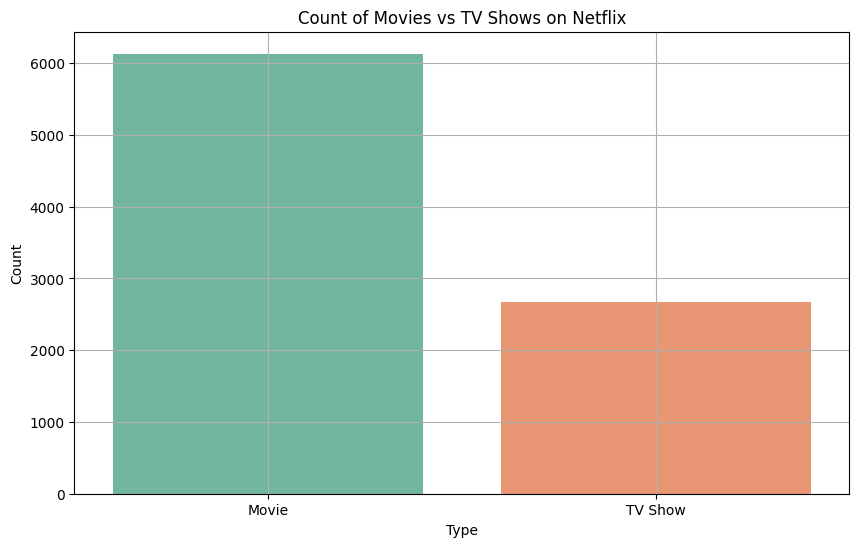

In [14]:
# Dashboard for Movies vs. TV Shows
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid()
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_10920\1219540109.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')


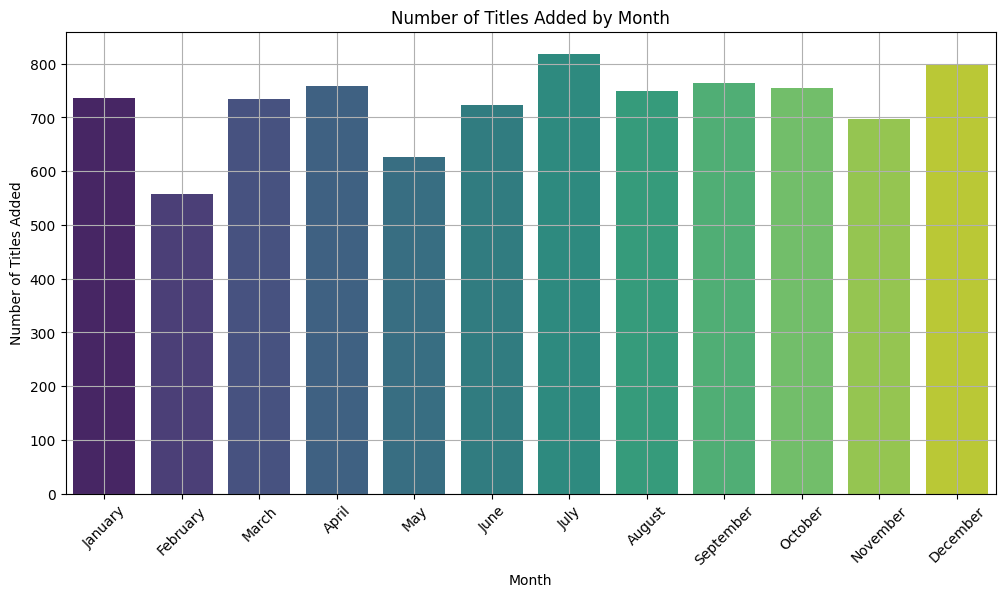

In [15]:
# Dashboard for Best Month to Release Content
plt.figure(figsize=(12, 6))
month_counts = df['month_added'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title('Number of Titles Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [16]:
# Define IMDb-style rating mapping
# those rating I took them from the IMDB application and from another dataset
imdb_rating_map = {
    "G": 7.5,
    "PG": 7.0,
    "PG-13": 6.5,
    "R": 6.0,
    "NC-17": 5.5,
    "TV-Y": 8.5,
    "TV-Y7": 8.0,
    "TV-G": 8.2,
    "TV-PG": 7.2,
    "TV-14": 6.8,
    "TV-MA": 6.0
}

# Apply the mapping
df["imdb_style_rating"] = df["rating"].map(imdb_rating_map)

In [17]:
# Analyzing IMDB Ratings

# Filter for movies only
movies = df[df['type'] == 'Movie']

# Get top rated movies
top_rated_movies = movies.sort_values(by='imdb_style_rating', ascending=False).head(10)

# Display top rated movies
top_rated_movies[['title', 'imdb_style_rating']]

,title,imdb_style_rating
2061,Barbie Princess Adventure,8.5
7929,Samudri Lootere,8.5
1490,The Magic School Bus Rides Again In the Zone,8.5
5887,Walt Disney Animation Studios Short Films Coll...,8.5
2593,Thomas & Friends: Marvelous Machinery: A New A...,8.5
2594,Thomas & Friends: Marvelous Machinery: World o...,8.5
2595,Thomas & Friends: Thomas and the Royal Engine,8.5
4590,My Little Pony Equestria Girls: Rollercoaster ...,8.5
4589,My Little Pony Equestria Girls: Forgotten Frie...,8.5
3777,Silent,8.5


C:\Users\Pc\AppData\Local\Temp\ipykernel_10920\1337229915.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_movies['imdb_style_rating'], y=top_rated_movies['title'], palette='viridis')


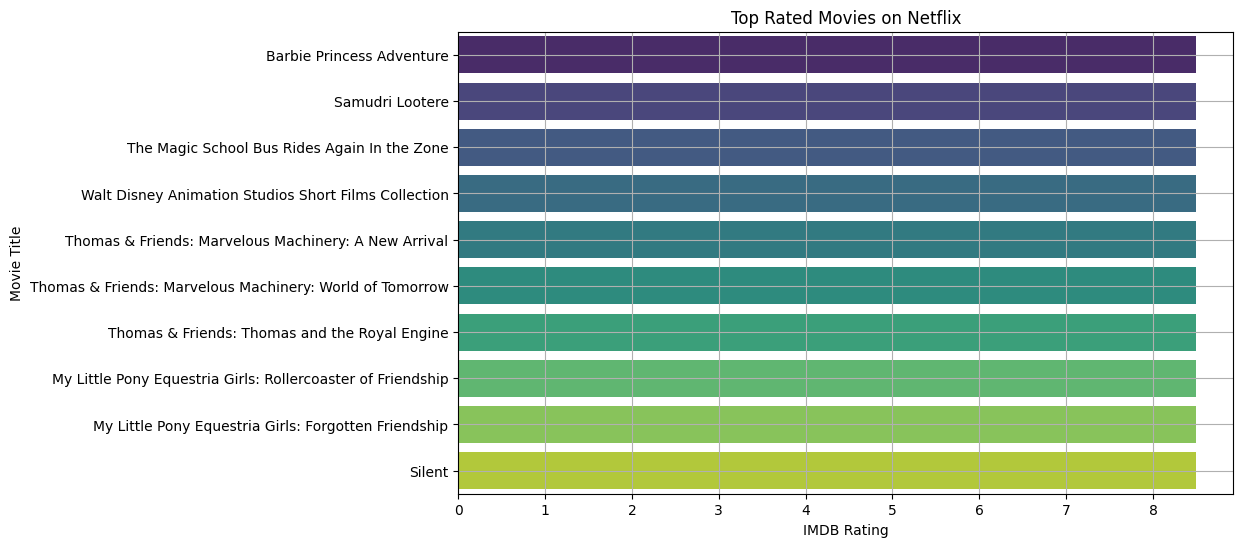

In [18]:
# Dashboard for Top Rated Movies

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated_movies['imdb_style_rating'], y=top_rated_movies['title'], palette='viridis')
plt.title('Top Rated Movies on Netflix')
plt.xlabel('IMDB Rating')
plt.ylabel('Movie Title')
plt.grid()
plt.show()

C:\Users\Pc\AppData\Local\Temp\ipykernel_10920\1825420404.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')


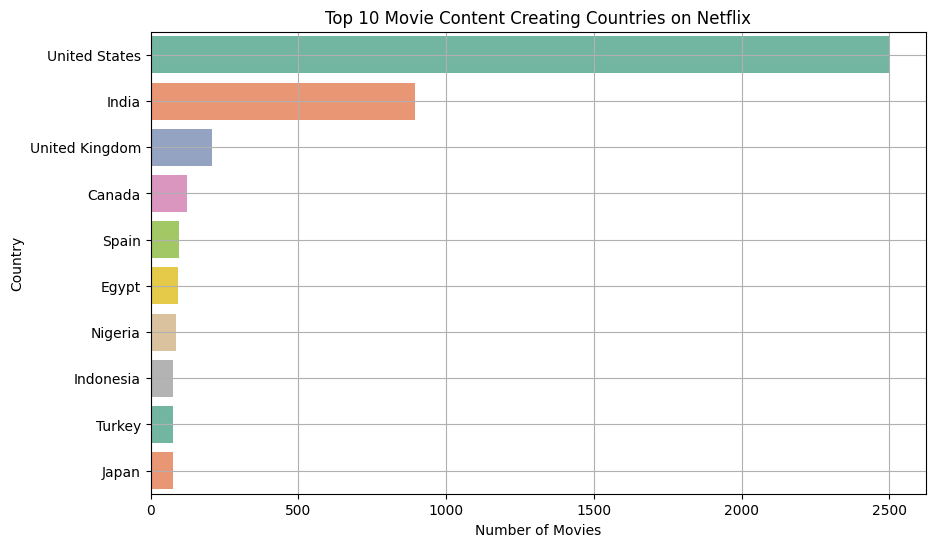

In [19]:
# Dashboard for Top 10 Movie Content Creating Countries
top_countries = movies['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='Set2')
plt.title('Top 10 Movie Content Creating Countries on Netflix')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.grid()
plt.show()